In [1]:
import os

# Set up Kaggle API
os.environ['KAGGLE_CONFIG_DIR'] = "/content"
!mkdir -p ~/.kaggle
!cp /content/kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

print("✅ Kaggle API key is set up.")


✅ Kaggle API key is set up.


In [3]:
import numpy as np
import pandas as pd

# Simulate 100 samples with 50 CpG methylation features
np.random.seed(42)
X = np.random.rand(100, 50)  # Values between 0 and 1 (methylation beta values)
y = np.random.choice([0, 1], size=100)  # 0 = normal, 1 = cancer

# Create DataFrame
columns = [f"CpG_{i+1}" for i in range(50)]
df = pd.DataFrame(X, columns=columns)
df['cancer'] = y

# Save to CSV
df.to_csv("synthetic_methylation.csv", index=False)
print("✅ Synthetic methylation dataset created.")


✅ Synthetic methylation dataset created.


In [4]:
df = pd.read_csv("synthetic_methylation.csv")
df.head()


,CpG_1,CpG_2,CpG_3,CpG_4,CpG_5,CpG_6,CpG_7,CpG_8,CpG_9,CpG_10,...,CpG_42,CpG_43,CpG_44,CpG_45,CpG_46,CpG_47,CpG_48,CpG_49,CpG_50,cancer
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0
1,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,...,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,1
2,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.251782,0.497249,0.300878,0.284840,0.036887,0.609564,0.502679,0.051479,0.278646,0
3,0.908266,0.239562,0.144895,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,0.728216,...,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876,1
4,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.953929,0.914864,0.370159,0.015457,0.928319,0.428184,0.966655,0.963620,0.853009,1


In [5]:
df = pd.read_csv("synthetic_methylation.csv")
df.head()


,CpG_1,CpG_2,CpG_3,CpG_4,CpG_5,CpG_6,CpG_7,CpG_8,CpG_9,CpG_10,...,CpG_42,CpG_43,CpG_44,CpG_45,CpG_46,CpG_47,CpG_48,CpG_49,CpG_50,cancer
0,0.374540,0.950714,0.731994,0.598658,0.156019,0.155995,0.058084,0.866176,0.601115,0.708073,...,0.495177,0.034389,0.909320,0.258780,0.662522,0.311711,0.520068,0.546710,0.184854,0
1,0.969585,0.775133,0.939499,0.894827,0.597900,0.921874,0.088493,0.195983,0.045227,0.325330,...,0.713245,0.760785,0.561277,0.770967,0.493796,0.522733,0.427541,0.025419,0.107891,1
2,0.031429,0.636410,0.314356,0.508571,0.907566,0.249292,0.410383,0.755551,0.228798,0.076980,...,0.251782,0.497249,0.300878,0.284840,0.036887,0.609564,0.502679,0.051479,0.278646,0
3,0.908266,0.239562,0.144895,0.489453,0.985650,0.242055,0.672136,0.761620,0.237638,0.728216,...,0.897216,0.900418,0.633101,0.339030,0.349210,0.725956,0.897110,0.887086,0.779876,1
4,0.642032,0.084140,0.161629,0.898554,0.606429,0.009197,0.101472,0.663502,0.005062,0.160808,...,0.953929,0.914864,0.370159,0.015457,0.928319,0.428184,0.966655,0.963620,0.853009,1


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Load data
df = pd.read_csv("synthetic_methylation.csv")

# Features and labels
X = df.drop("cancer", axis=1)
y = df["cancer"]

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
acc = accuracy_score(y_test, y_pred)
print(f"🎯 Accuracy: {acc:.2f}")
print("\n🧪 Classification Report:\n")
print(classification_report(y_test, y_pred))


🎯 Accuracy: 0.50

🧪 Classification Report:

              precision    recall  f1-score   support

           0       0.50      0.50      0.50        10
           1       0.50      0.50      0.50        10

    accuracy                           0.50        20
   macro avg       0.50      0.50      0.50        20
weighted avg       0.50      0.50      0.50        20



/tmp/ipython-input-7-1213175477.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_df, palette="viridis")


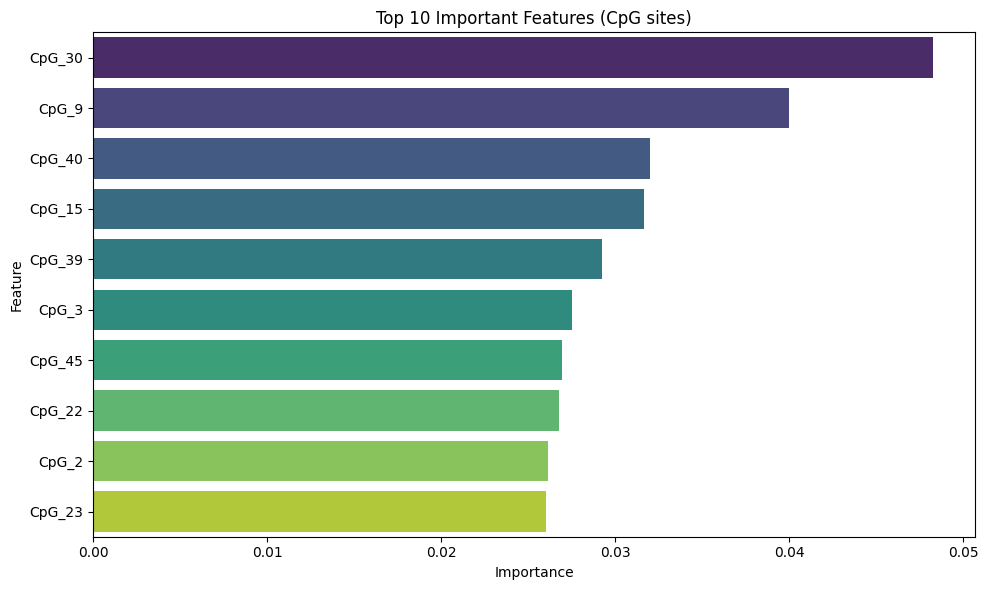

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = model.feature_importances_
features = X.columns

# Create DataFrame
feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df = feat_df.sort_values(by='Importance', ascending=False).head(10)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=feat_df, palette="viridis")
plt.title("Top 10 Important Features (CpG sites)")
plt.tight_layout()
plt.show()


In [8]:
import joblib

# Save model to file
joblib.dump(model, "methylation_rf_model.pkl")
print("🎯 Model saved as methylation_rf_model.pkl")

🎯 Model saved as methylation_rf_model.pkl
